In [4]:
# Imports
import pandas as pd
import numpy as np
from scipy import stats

In [5]:
# Datas
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/Lab1/stud.csv"

In [6]:
df = pd.read_csv(url, sep=',')
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade
0,47412,20,s47412@oslomet.no,5,46.0
1,15077,22,s15077@oslomet.no,0,65.0
2,15467,27,s15467@oslomet.no,1,26.0
3,17907,21,s17907@oslomet.no,6,68.0
4,13352,333,s13352@oslomet.no,4,34.0


In [12]:
df = df.replace(r'^\s*$', np.nan, regex=True) #Replace blank values with np.nan values
df.isna().sum()

StudentID     0
Age           1
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [14]:
df["Age"].replace(np.nan, 0, inplace=True)
df.isna().sum()

StudentID     0
Age           0
email         0
hrsStudy      1
FinalGrade    1
dtype: int64

In [15]:
df.dropna(inplace=True)
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         48 non-null     object 
 2   email       48 non-null     object 
 3   hrsStudy    48 non-null     object 
 4   FinalGrade  48 non-null     float64
dtypes: float64(1), int64(1), object(3)
memory usage: 2.2+ KB


StudentID     0
Age           0
email         0
hrsStudy      0
FinalGrade    0
dtype: int64

In [16]:
df["Age"] = df["Age"].astype(str).astype(int)
df["hrsStudy"] = df["hrsStudy"].astype(str).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   StudentID   48 non-null     int64  
 1   Age         48 non-null     int32  
 2   email       48 non-null     object 
 3   hrsStudy    48 non-null     int32  
 4   FinalGrade  48 non-null     float64
dtypes: float64(1), int32(2), int64(1), object(1)
memory usage: 1.9+ KB


<AxesSubplot:>

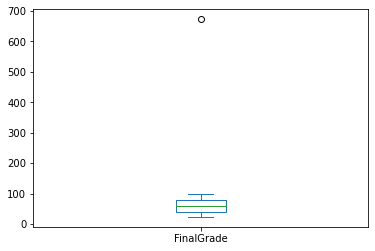

In [17]:
df["FinalGrade"].plot.box()

<AxesSubplot:>

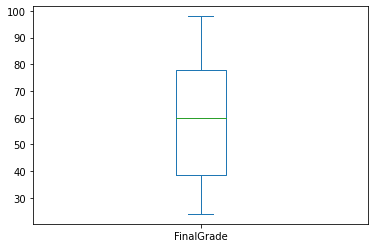

In [18]:
df = df[df.FinalGrade <= 100]
df["FinalGrade"].plot.box()

In [19]:
conditions = [
    (df["FinalGrade"] <= 50),
    ((df["FinalGrade"] <= 60) & (df["FinalGrade"] > 50)),
    ((df["FinalGrade"] <= 70) & (df["FinalGrade"] > 60)),
    ((df["FinalGrade"] <= 80) & (df["FinalGrade"] > 70)),
    ((df["FinalGrade"] <= 90) & (df["FinalGrade"] > 80)),
    (df["FinalGrade"] > 90)
]
values = ["F", "E", "D", "C", "B", "A"]
df["Grade"] = np.select(conditions, values)
df.head()

,StudentID,Age,email,hrsStudy,FinalGrade,Grade
0,47412,20,s47412@oslomet.no,5,46.0,F
1,15077,22,s15077@oslomet.no,0,65.0,D
2,15467,27,s15467@oslomet.no,1,26.0,F
3,17907,21,s17907@oslomet.no,6,68.0,D
4,13352,333,s13352@oslomet.no,4,34.0,F


<AxesSubplot:xlabel='Grade'>

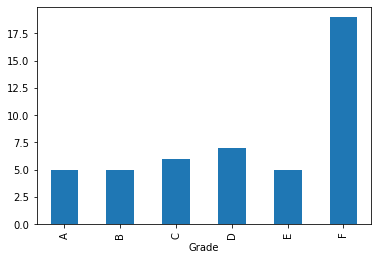

In [23]:
gradeGroups = df.groupby("Grade").count()
gradeGroups["FinalGrade"].plot.bar()